<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N¬∞05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gr√°ficos adecuados para distintos tipos de variables y preguntas de an√°lisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene informaci√≥n sobre los t√≠tulos disponibles en la plataforma Netflix hasta el a√±o 2021.

| Variable       | Clase     | Descripci√≥n                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador √∫nico del t√≠tulo en el cat√°logo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | T√≠tulo del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | Pa√≠s o pa√≠ses donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el t√≠tulo fue agregado al cat√°logo de Netflix.              |
| release_year   | entero    | A√±o de lanzamiento original del t√≠tulo.                                     |
| rating         | caracter  | Clasificaci√≥n por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duraci√≥n del contenido (minutos o n√∫mero de temporadas para series).        |
| listed_in      | caracter  | Categor√≠as o g√©neros en los que est√° clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [ ]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## üìä Parte 1: Exploraci√≥n visual b√°sica

1. **Distribuci√≥n de tipos de contenido**

   * Realiza un gr√°fico de barras mostrando la cantidad de pel√≠culas vs series (`type`).
   * Pregunta gu√≠a: ¬øCu√°l es el tipo de contenido predominante en Netflix? ¬øQu√© implicancias podr√≠a tener para los usuarios?

2. **Histograma de a√±os de lanzamiento**

   * Muestra c√≥mo se distribuyen los t√≠tulos seg√∫n su `release_year`.
   * Pregunta gu√≠a: ¬øHay m√°s contenido reciente o antiguo? ¬øNotas alg√∫n patr√≥n en d√©cadas espec√≠ficas?

3. **Proporci√≥n de clasificaciones por edad (`rating`)**

   * Haz un gr√°fico circular o de barras.
   * Pregunta gu√≠a: ¬øQu√© clasificaci√≥n es m√°s com√∫n? ¬øCrees que Netflix est√° m√°s enfocado en p√∫blico adulto, familiar o infantil?



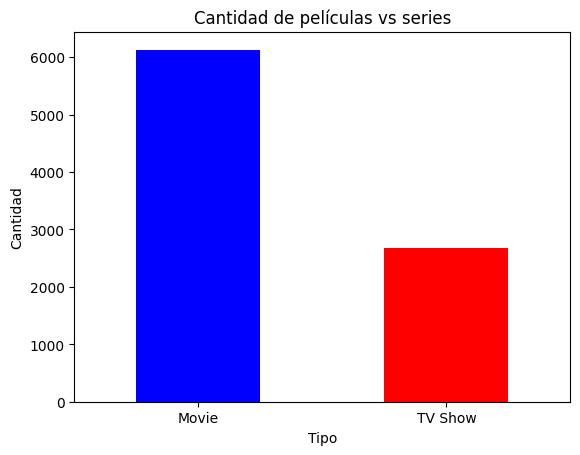

In [24]:
#1
#normalizar
df.columns = df.columns.str.lower().str.strip()

conteo = df["type"].value_counts()

#graficar
conteo.plot(kind="bar", color=["blue", "red"])
plt.title("Cantidad de pel√≠culas vs series")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()

El m√°s predominante es Movies, por lo que los usuarios pueden estar prefiriendo consumir un contenido m√°s corto que algo de mayor duraci√≥n que puede llevar hasta meses esperando a un nuevo capitulo como en las series.

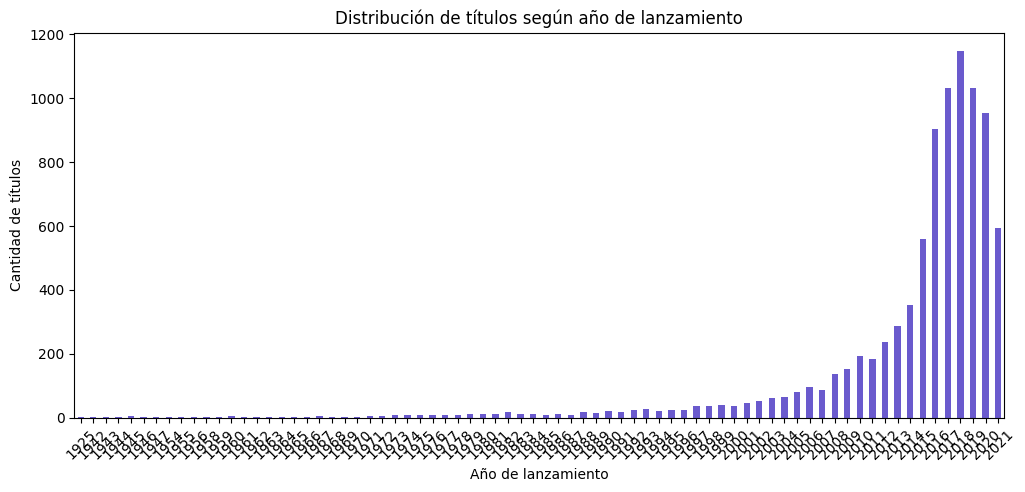

In [8]:
#2
conteo_year = df["release_year"].value_counts().sort_index()
#graficar
conteo_year.plot(kind="bar", figsize=(12,5), color="slateblue")
plt.title("Distribuci√≥n de t√≠tulos seg√∫n a√±o de lanzamiento")
plt.xlabel("A√±o de lanzamiento")
plt.ylabel("Cantidad de t√≠tulos")
plt.xticks(rotation=45)
plt.show()

Hay m√°s contenido reciente, y se nota un aumento en la decada de los 2010 a 2020. En 2021 hubo un baj√≥n, quiz√° debido a la pandemia.

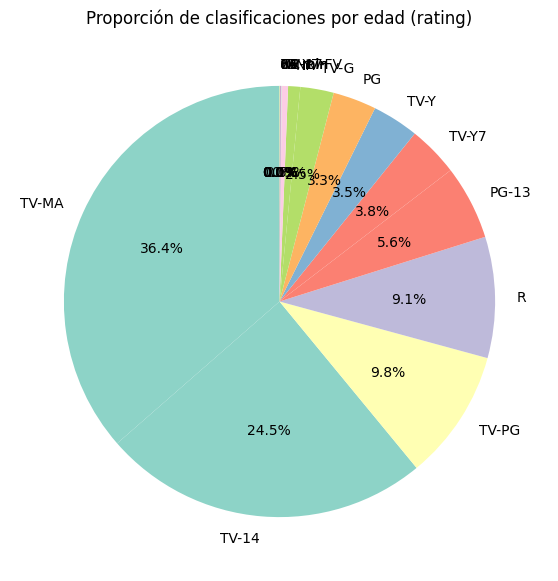

In [10]:
#3
conteo_rating = df["rating"].value_counts()
#circular
plt.figure(figsize=(7,7))
conteo_rating.plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="Set3")
plt.ylabel("")
plt.title("Proporci√≥n de clasificaciones por edad (rating)")
plt.show()


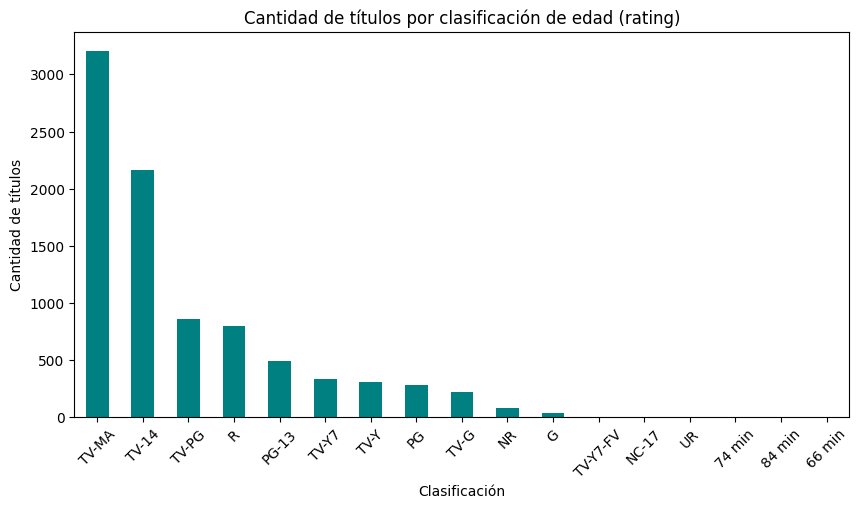

In [11]:
#barras
plt.figure(figsize=(10,5))
conteo_rating.plot(kind="bar", color="teal")
plt.title("Cantidad de t√≠tulos por clasificaci√≥n de edad (rating)")
plt.xlabel("Clasificaci√≥n")
plt.ylabel("Cantidad de t√≠tulos")
plt.xticks(rotation=45)
plt.show()

La m√°s com√∫n es TV-MA, la cual es para mayores de 18 a√±os, o sea un p√∫blico adulto.



## üé® Parte 2: Tendencias y evoluci√≥n en el tiempo

4. **N√∫mero de t√≠tulos agregados por a√±o**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta gu√≠a: ¬øCu√°ndo creci√≥ m√°s el cat√°logo de Netflix? ¬øQu√© relaci√≥n podr√≠a tener con la expansi√≥n internacional de la plataforma?

5. **Heatmap de lanzamientos por a√±o y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta gu√≠a: ¬øHay meses con m√°s estrenos que otros? ¬øQu√© conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duraci√≥n de pel√≠culas por g√©nero**

   * Extrae la duraci√≥n en minutos y crea un boxplot agrupado por g√©nero principal.
   * Pregunta gu√≠a: ¬øQu√© g√©neros suelen durar m√°s? ¬øQu√© podr√≠as decir sobre la variabilidad dentro de un mismo g√©nero?


In [ ]:
#4
#eliminar espacios
df["date_added"] = df["date_added"].str.strip()

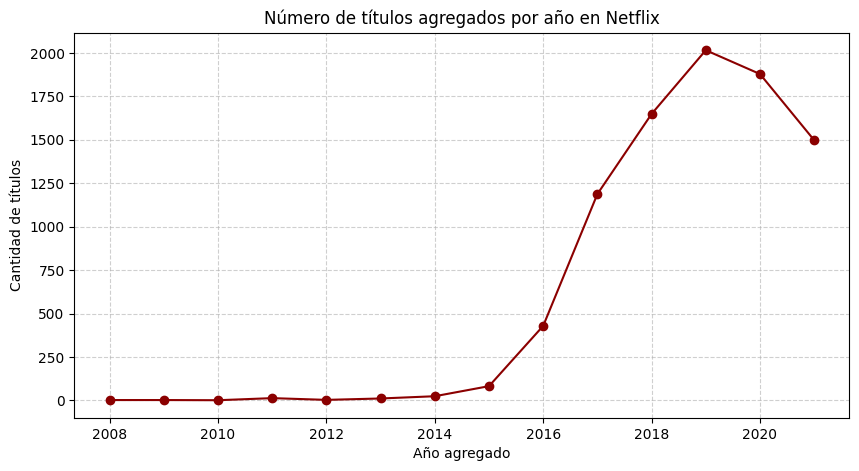

In [18]:
#4
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
conteo_year_add = df["year_added"].value_counts().sort_index()

#grafico
plt.figure(figsize=(10,5))
conteo_year_add.plot(kind="line", marker="o", color="darkred")
plt.title("N√∫mero de t√≠tulos agregados por a√±o en Netflix")
plt.xlabel("A√±o agregado")
plt.ylabel("Cantidad de t√≠tulos")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Creci√≥ m√°s entre el 2018 al 2019. Netflix se lanz√≥ de manera oficial para m√°s de 190 paises en 2016, por lo que ya instalada en muchos mercados, la compa√±√≠a comenz√≥ a invertir m√°s en producciones locales, series y pel√≠culas hechas en distintos pa√≠ses para atraer suscriptores de sus respectivas regiones

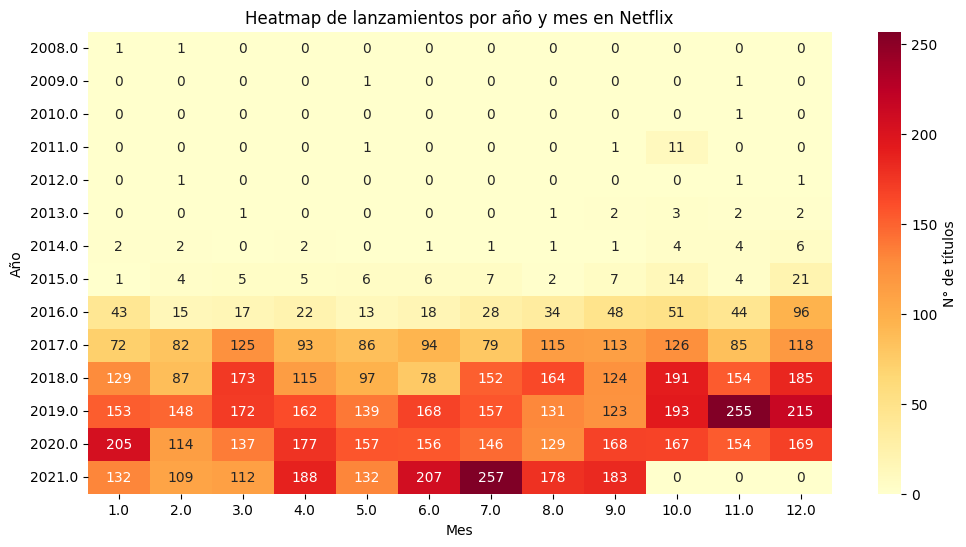

In [20]:
#5
#df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors="coerce")
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month
pivot_table = df.pivot_table(
    index="year_added",
    columns="month_added",
    values="show_id",
    aggfunc="count",
    fill_value=0
)
#grafico
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt="d", cbar_kws={'label': 'N¬∞ de t√≠tulos'})

plt.title("Heatmap de lanzamientos por a√±o y mes en Netflix")
plt.xlabel("Mes")
plt.ylabel("A√±o")
plt.show()

Si, se ve que Frebrero y Mayo no son meses donde se lancen muchos titulos, a diferencia de Octubre, Noviembre y Diciembre donde se ve mayor cantidad de titulos lanzados. Quiz√°s por las festevidades que vienen esos d√≠as, la gente consume m√°s ese tipo de contenido con esa tematica.

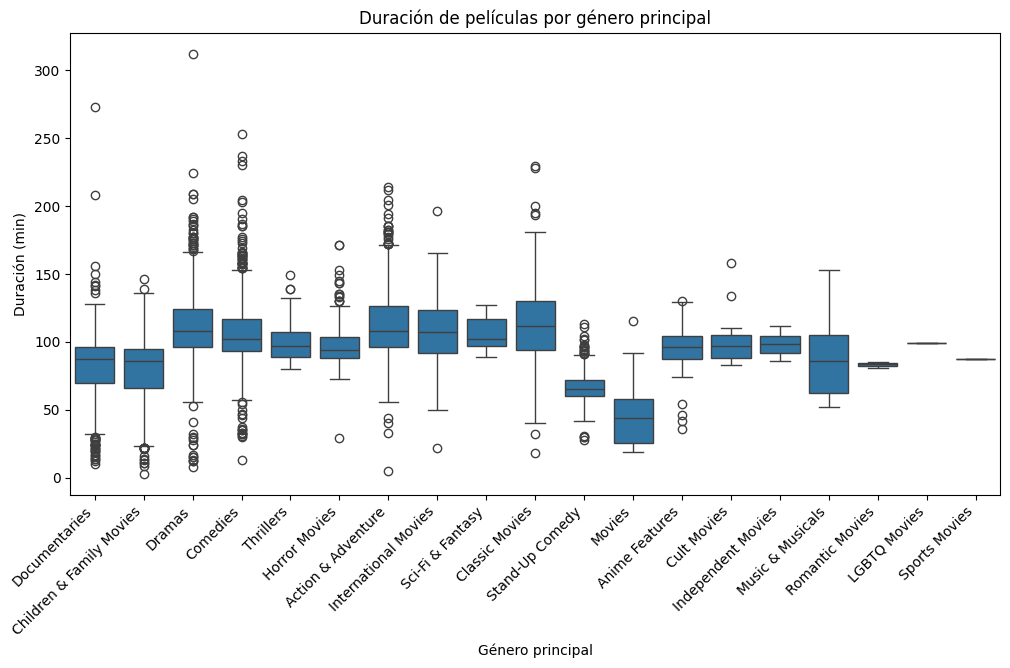

In [25]:
#6
movies = df[df["type"] == "Movie"].copy()
movies["duration_min"] = movies["duration"].str.replace(" min", "", regex=False).astype(float)
movies["main_genre"] = movies["listed_in"].str.split(",").str[0].str.strip()

#boxtop
plt.figure(figsize=(12,6))
sns.boxplot(data=movies, x="main_genre", y="duration_min")

plt.title("Duraci√≥n de pel√≠culas por g√©nero principal")
plt.xlabel("G√©nero principal")
plt.ylabel("Duraci√≥n (min)")
plt.xticks(rotation=45, ha="right")
plt.show()


El g√©nero International Movies, Action & Adventure y Classic Movies tienen la l√≠nea de la mediana m√°s alta, ubicada aproximadamente en 120 minutos. Esto significa que la mitad de las pel√≠culas de este g√©nero duran m√°s de 120 minutos.
En este caso, la variabilidad dentro de un g√©nero se refiere a cu√°n dispersas o agrupadas est√°n las duraciones de las pel√≠culas de ese g√©nero



## üî• Parte 3: Comparaciones y relaciones

7. **Top 10 pa√≠ses con m√°s producciones**

   * Usa un gr√°fico de barras para mostrar los pa√≠ses m√°s frecuentes en la columna `country`.
   * Pregunta gu√≠a: ¬øQu√© pa√≠ses dominan el cat√°logo? ¬øSorprende la distribuci√≥n o es esperada?

8. **Pel√≠culas vs Series seg√∫n g√©nero**

   * Realiza un gr√°fico de barras apiladas para mostrar la cantidad de t√≠tulos por g√©nero, separando `Movie` y `TV Show`.
   * Pregunta gu√≠a: ¬øExisten g√©neros m√°s asociados a pel√≠culas o a series?

9. **Relaci√≥n entre duraci√≥n y a√±o de lanzamiento**

   * Haz un gr√°fico de dispersi√≥n (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta gu√≠a: ¬øHan cambiado los est√°ndares de duraci√≥n de las pel√≠culas con el tiempo? ¬øSe ven outliers interesantes?



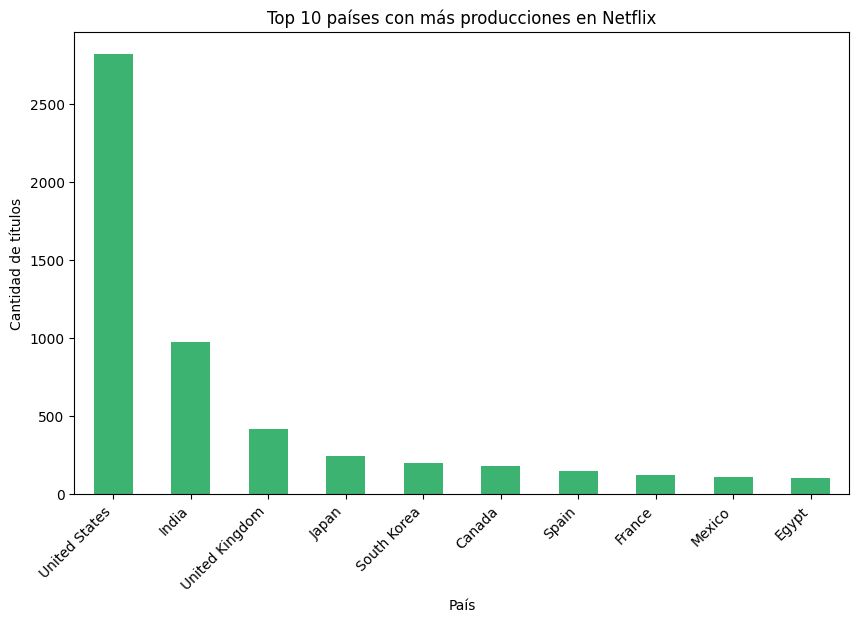

In [26]:
#7
conteo_paises = df["country"].value_counts().head(10)
#grafico
plt.figure(figsize=(10,6))
conteo_paises.plot(kind="bar", color="mediumseagreen")
plt.title("Top 10 pa√≠ses con m√°s producciones en Netflix")
plt.xlabel("Pa√≠s")
plt.ylabel("Cantidad de t√≠tulos")
plt.xticks(rotation=45, ha="right")
plt.show()

La lideran USA e India. Es esperada, asumiendo que son de los paises con mayor poblaci√≥n del mundo.

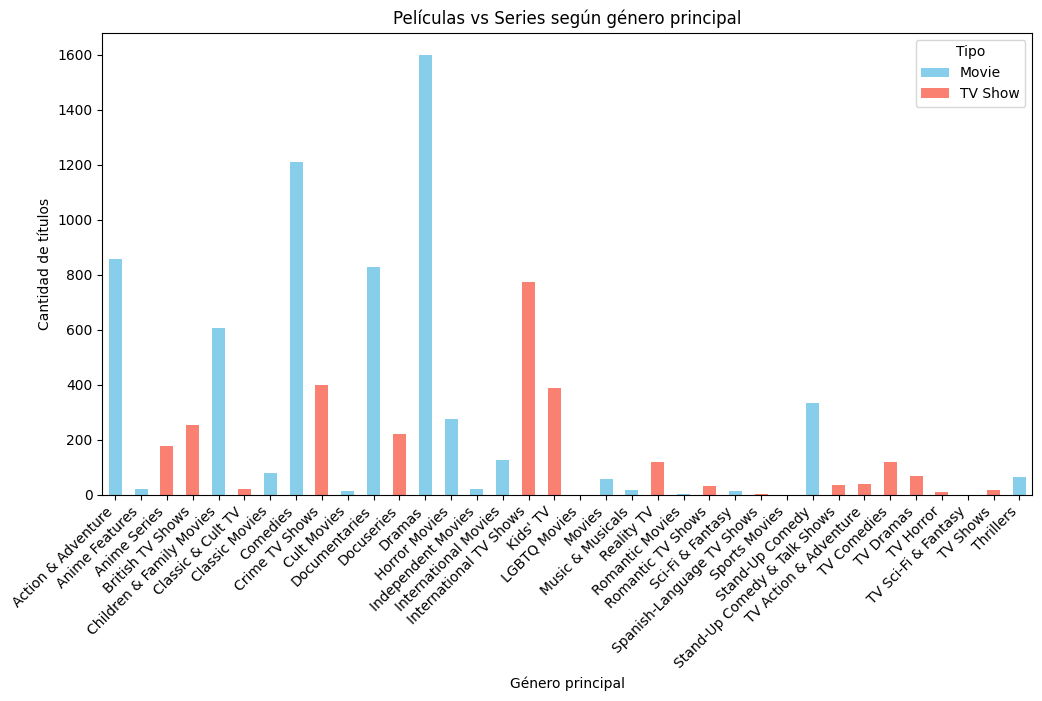

In [27]:
#8
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()
tabla = pd.crosstab(df["main_genre"], df["type"])
#grafico
tabla.plot(kind="bar", stacked=True, figsize=(12,6), color=["skyblue", "salmon"])
plt.title("Pel√≠culas vs Series seg√∫n g√©nero principal")
plt.xlabel("G√©nero principal")
plt.ylabel("Cantidad de t√≠tulos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo")
plt.show()

Si, por el gr√°fico, Dramas est√° m√°s asociado a peliculas, mientras que International TV Shows est√° m√°s asociado a series.

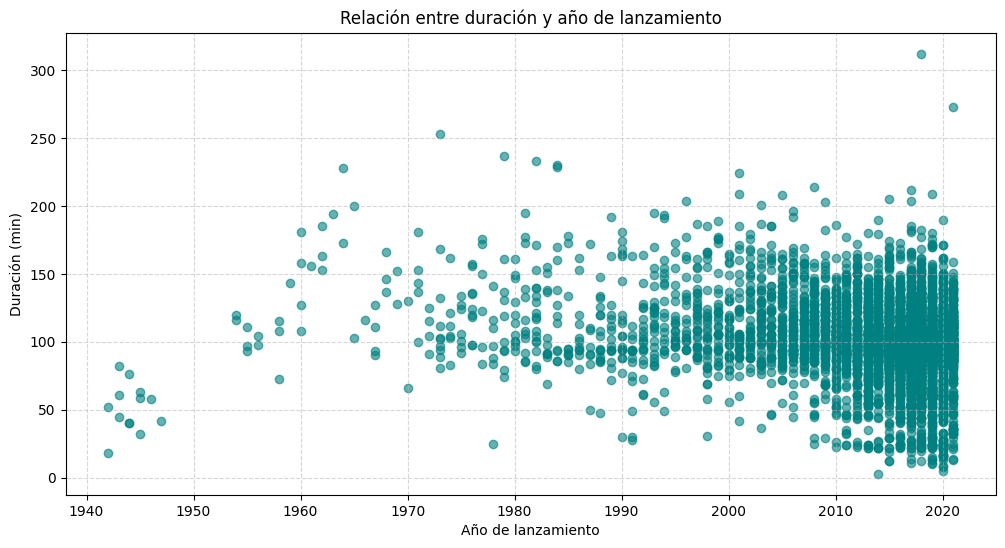

In [29]:
#9
movies = df[df["type"] == "Movie"].copy()
movies["duration_min"] = movies["duration"].str.replace(" min", "", regex=False).astype(float)
#scatterplot
plt.figure(figsize=(12,6))
plt.scatter(movies["release_year"], movies["duration_min"], alpha=0.6, color="teal")

plt.title("Relaci√≥n entre duraci√≥n y a√±o de lanzamiento")
plt.xlabel("A√±o de lanzamiento")
plt.ylabel("Duraci√≥n (min)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Los est√°ndares de duraci√≥n de las pel√≠culas no han cambiado significativamente, manteni√©ndose la mayor√≠a en el rango de 90 a 120 minutos. Sin embargo, a partir de 1960, la variabilidad de la duraci√≥n parece haber aumentado, con m√°s pel√≠culas que superan los 150 minutos. Los outliers m√°s interesantes son pel√≠culas extremadamente largas lanzadas en los √∫ltimos a√±os y varias pel√≠culas cortas en las primeras d√©cadas.

## ‚≠ê Desaf√≠o Final

* Encuentra las combinaciones m√°s frecuentes de **g√©nero + rating** y repres√©ntalas en un **heatmap o gr√°fico de burbujas**.
* Pregunta gu√≠a: ¬øQu√© g√©neros est√°n m√°s dirigidos a un p√∫blico adulto? ¬øY cu√°les a p√∫blico familiar o infantil?

# FIXME

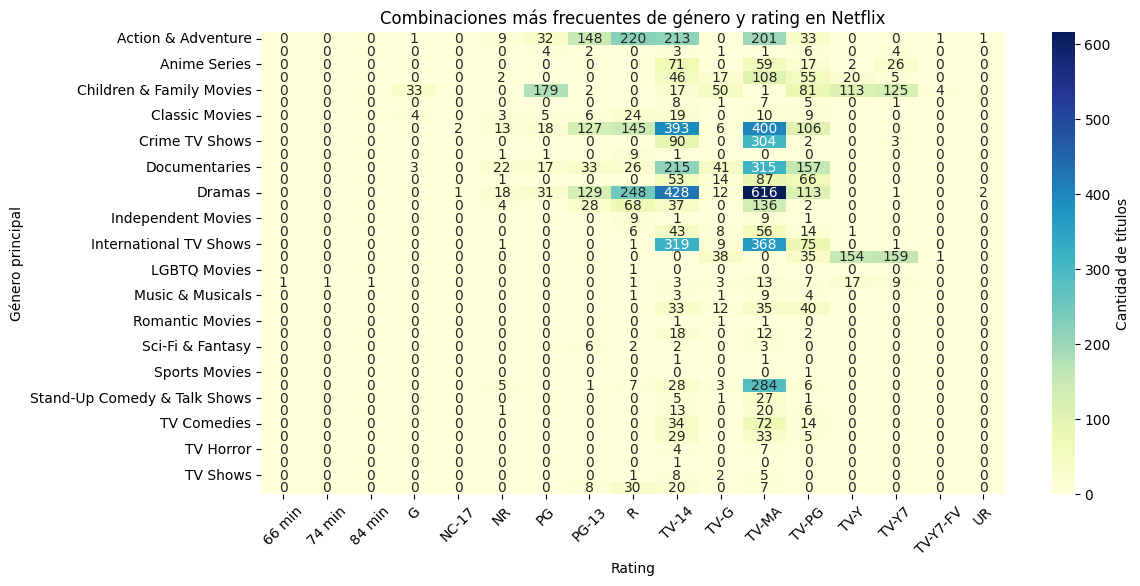

In [30]:
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()
tabla = pd.crosstab(df["main_genre"], df["rating"])
#grafico
plt.figure(figsize=(12,6))
sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Cantidad de t√≠tulos'})
plt.title("Combinaciones m√°s frecuentes de g√©nero y rating en Netflix")
plt.xlabel("Rating")
plt.ylabel("G√©nero principal")
plt.xticks(rotation=45)
plt.show()

Los g√©neros m√°s dirigidos a un p√∫blico adulto son Dramas, TV Dramas y Crime TV Shows, con un gran n√∫mero de t√≠tulos en los ratings TV-MA y R. El p√∫blico familiar o infantil est√° m√°s representado por los g√©neros Children & Family Movies y Anime Series, concentrados en ratings como G, PG y TV-G.